In [ ]:
import torch
from nd_scaffold import *
from vectorhash_functions import *
from tqdm import tqdm

device='cuda'
lambdas = [2,3,5]
shapes = [(l, l, l) for l in lambdas]
gs = GridScaffold(
    shapes=shapes,
    N_h=1200,
    input_size=1,
    h_normal_mean=0,
    h_normal_std=1,
    T=0.00000001,
    ratshift=True,
    device=device
)

module shapes:  [(2, 2, 2), (3, 3, 3), (5, 5, 5)]
N_g     :  160
N_patts :  27000
N_h     :  1200


In [2]:
vels = spacefillingcurve(shapes)

In [3]:
estimated_grid_positions = [gs.g]

for i in tqdm(range(len(vels) // 100)):
    estimated_grid_positions.append(gs.g)
    gs.shift(vels[i])

100%|██████████| 252/252 [00:24<00:00, 10.46it/s]


In [4]:
estimated_grid_coordinates = [[] for l in lambdas]

for i in range(len(estimated_grid_positions)):
    pos = 0
    for j, l in enumerate(lambdas):
        estimated_grid_coordinates[j].append(
            ConvertToXYZ(estimated_grid_positions[i][pos : pos + l**3], shape=(l, l, l))
        )
        pos += l**3
        print(estimated_grid_coordinates[j][-1])

(4,) (4,) (4,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(9,) (9,) (9,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(25,) (25,) (25,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(4,) (4,) (4,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(9,) (9,) (9,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(25,) (25,) (25,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(4,) (4,) (4,)
(np.float64(2.5), np.float64(0.5), np.float64(1.5))
(9,) (9,) (9,)
(np.float64(3.5), np.float64(0.5), np.float64(1.5))
(25,) (25,) (25,)
(np.float64(5.5), np.float64(0.5), np.float64(1.5))
(4,) (4,) (4,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(9,) (9,) (9,)
(np.float64(6.5), np.float64(0.5), np.float64(2.5))
(25,) (25,) (25,)
(np.float64(10.5), np.float64(0.5), np.float64(2.5))
(4,) (4,) (4,)
(np.float64(2.5), np.float64(0.5), np.float64(1.5))
(9,) (9,) (9,)
(np.float64(0.5), np.float64(0.5), np.float64(0.5))
(25,) (25,) (25,)
(np.float64(15.5), np.float64(0

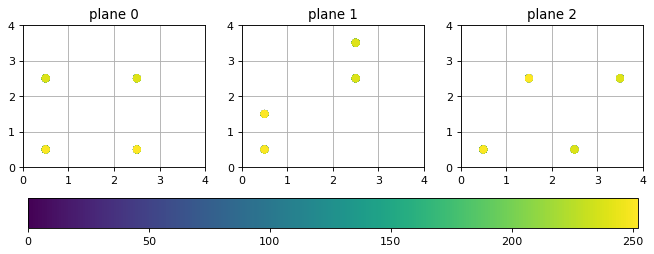

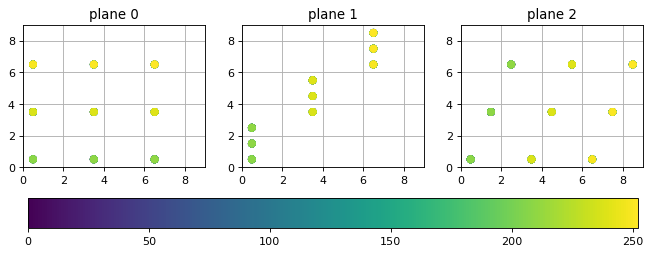

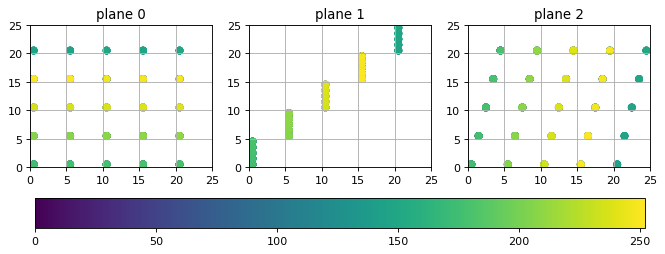

In [5]:
# importing required libraries 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt

c = np.arange(len(estimated_grid_positions))

for i,l in enumerate(lambdas):
  t = torch.tensor(estimated_grid_coordinates[i])
  # plot projections onto all 3 planes

  fig = plt.figure(figsize=(10, 3.3), dpi=80)
  axes = fig.subplots(1, 3)

  for j in range(3):
      cb = axes[j].scatter(t[:, j], t[:, (j+1)%3], c=c)
      axes[j].set_title(f"plane {j}")

      axes[j].set_xlim([0, l**2])
      axes[j].set_ylim([0, l**2])
      axes[j].grid()
  
  fig.colorbar(cb, ax=axes, orientation='horizontal')

  plt.show()


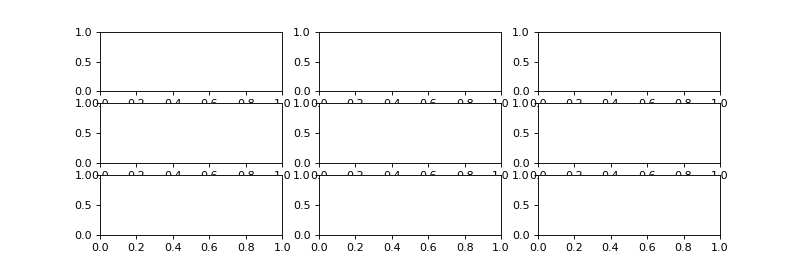

In [ ]:
# make animation of adding points to the grid, 3xplane projection
import matplotlib.animation as animation
%matplotlib widget
from matplotlib.animation import PillowWriter

fig = plt.figure(figsize=(10, 3.3), dpi=80)
axes = fig.subplots(len(lambdas), 3)

ts = [torch.tensor(estimated_grid_coordinates[i]) for i in range(len(lambdas))]
def update(i):
  for idx,l in enumerate(lambdas):
    for j in range(3):
        axes[idx][j].clear()
        axes[idx][j].scatter(ts[idx][:i, j], ts[idx][:i, (j+1)%3], c=c[:i])
        axes[idx][j].set_title(f"plane {j}")

        axes[idx][j].set_xlim([0, l**2])
        axes[idx][j].set_ylim([0, l**2])
        axes[idx][j].grid()

    fig.suptitle(f"frame {i}/{len(t)}")

ani = animation.FuncAnimation(fig, update, frames=len(t), interval=100, blit=True)
